# Basic Cluster Model

## Overview
In this model we mainly take a look at the silhouette scores of three clusters to see how well we can get similarities of the data. Something to take into consideration is that there might be large outliers in the numeric features which could cause similarity issues. Additionally I think it would be best if we looked at the genre in an encoded manner to receive better scores. Here I have [linked](https://www.baeldung.com/cs/silhouette-values-clustering#:~:text=A%20silhouette%20plot%20is%20a%20graphical%20tool%20we%20use%20to,and%20separation%20of%20the%20clusters.) what helped me understand the clusters and what the looks of the charts mean. [This](https://builtin.com/data-science/data-clustering-python) also helped me with some of the process for creating the simple model.

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
# Load the song data
songs = pd.read_csv('../data/clean_data.csv', index_col=0)
songs.head()

,Track,Artist,Genre,Album Title,Album Type,Release Date,Thumbnail,Acousticness,Danceability,Energy,Instrumentalness,Popularity,Speechiness,Track ID,Release Year
0,"Shook Ones, Pt. II",Mobb Deep,"east coast hip hop, hardcore hip hop, hip hop,...",The Infamous,album,1995-04-25,https://i.scdn.co/image/ab67616d00004851a2203f...,0.01460,0.763,0.786,0.011400,0.787879,0.229,33ZXjLCpiINn8eQIDYEPTD,1995
1,Hypnotize - 2014 Remaster,The Notorious B.I.G.,"east coast hip hop, gangster rap, hardcore hip...",Life After Death (2014 Remastered Edition),album,1997-03-04,https://i.scdn.co/image/ab67616d00004851fde79b...,0.14500,0.901,0.697,0.000000,0.838384,0.280,7KwZNVEaqikRSBSpyhXK2j,1997
2,Ambitionz Az A Ridah,2Pac,"g funk, gangster rap, hip hop, rap, west coast...",All Eyez On Me,album,1996-02-13,https://i.scdn.co/image/ab67616d00004851a786ad...,0.00253,0.801,0.908,0.000655,0.020202,0.221,3ssX20QT5c3nA9wk78V1LQ,1996
3,N.Y. State of Mind,Nas,"conscious hip hop, east coast hip hop, gangste...",Illmatic,album,1994-04-19,https://i.scdn.co/image/ab67616d00004851045fc9...,0.03940,0.665,0.910,0.000000,0.747475,0.223,0trHOzAhNpGCsGBEu7dOJo,1994
4,It Was A Good Day,Ice Cube,"conscious hip hop, g funk, gangster rap, hip h...",The Predator,album,1992-11-17,https://i.scdn.co/image/ab67616d00004851994c31...,0.33000,0.798,0.744,0.000106,0.848485,0.136,2qOm7ukLyHUXWyR4ZWLwxA,1992


In [3]:
# Selecting the features for clustering
#We will be focusing on the numeric features for this simple clustering model
features = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Popularity', 'Speechiness', 'Release Year']
X = songs[features]

In [4]:
# Here we will scale the features
sc = MinMaxScaler()
X_sc = sc.fit_transform(X)

In [5]:
# Hyperparameter tuning
best_score = -1
best_k = None

In [6]:
for k in range(2, 11):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_sc)

    # Evaluate clustering using silhouette score
    score = silhouette_score(X_sc, labels)

    # Update best score and number of clusters
    if score > best_score:
        best_score = score
        best_k = k

In [7]:
# Re-fittting the K-means with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_sc)

In [8]:
# Adding cluster assignments to the songs DataFrame
songs['Cluster'] = labels

In [9]:
# Calculating the cosine similarity within each cluster
cluster_similarities = []

In [10]:
for cluster_id in range(best_k):
    # Filtering songs belonging to the current cluster
    cluster_songs = songs[songs['Cluster'] == cluster_id][features]

    # Calculating the cosine similarity matrix for the songs in the cluster
    similarity_matrix = cosine_similarity(cluster_songs)

    # Storing the similarity matrix
    cluster_similarities.append(similarity_matrix)

In [11]:
# Printing the cosine similarity matrix for each cluster
for cluster_id, similarity_matrix in enumerate(cluster_similarities):
    print(f"Cluster {cluster_id} - Cosine similarity matrix:")
    print(similarity_matrix)
    print()

Cluster 0 - Cosine similarity matrix:
[[1.         0.99999992 0.99999994 ... 0.99999996 0.99999996 0.99999996]
 [0.99999992 1.         0.99999997 ... 0.99999997 0.99999998 0.99999998]
 [0.99999994 0.99999997 1.         ... 0.99999997 0.99999999 0.99999999]
 ...
 [0.99999996 0.99999997 0.99999997 ... 1.         0.99999997 0.99999999]
 [0.99999996 0.99999998 0.99999999 ... 0.99999997 1.         0.99999999]
 [0.99999996 0.99999998 0.99999999 ... 0.99999999 0.99999999 1.        ]]

Cluster 1 - Cosine similarity matrix:
[[1.         0.99999999 0.99999992 ... 0.99999997 0.99999999 0.99999999]
 [0.99999999 1.         0.99999991 ... 0.99999995 0.99999998 0.99999997]
 [0.99999992 0.99999991 1.         ... 0.99999995 0.99999996 0.99999997]
 ...
 [0.99999997 0.99999995 0.99999995 ... 1.         0.99999998 0.99999999]
 [0.99999999 0.99999998 0.99999996 ... 0.99999998 1.         1.        ]
 [0.99999999 0.99999997 0.99999997 ... 0.99999999 1.         1.        ]]

Cluster 2 - Cosine similarity matr

In [12]:
# Displaying the cluster assignments
print(songs[['Track', 'Artist', 'Cluster']].head())

                       Track                Artist  Cluster
0         Shook Ones, Pt. II             Mobb Deep        1
1  Hypnotize - 2014 Remaster  The Notorious B.I.G.        1
2       Ambitionz Az A Ridah                  2Pac        1
3         N.Y. State of Mind                   Nas        1
4          It Was A Good Day              Ice Cube        1


In [13]:
# Counting the number of songs in each cluster
cluster_counts = songs['Cluster'].value_counts()
print(cluster_counts)

1    5451
2    2475
0     790
Name: Cluster, dtype: int64


---
Below we will look at the Centroid Cluster for some of the features of the cluster model.

In [18]:
# Get the cluster centroids
centroids = kmeans.cluster_centers_

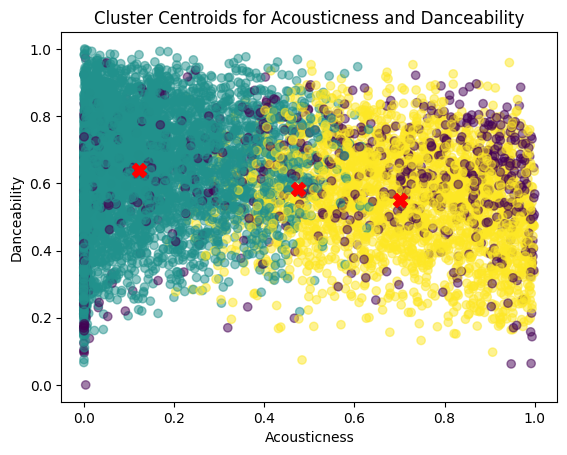

In [20]:
#We will select two features
feature1 = 'Acousticness'
feature2 = 'Danceability'

# Plot the cluster centroids
plt.scatter(X_sc[:, 0], X_sc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)

# Add axis labels and a title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Cluster Centroids for Acousticness and Danceability');

---
Below we will look at the Silhouetter Scores

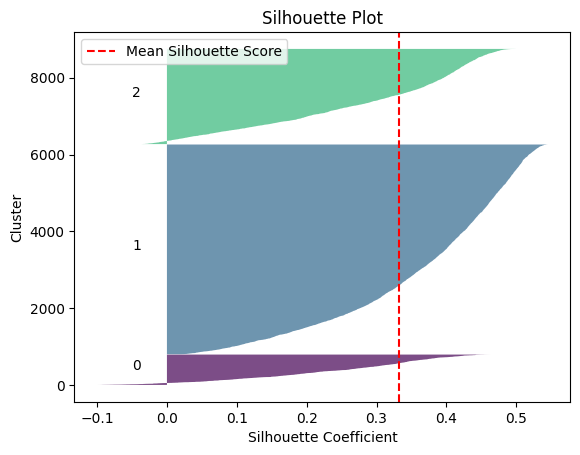

In [34]:
# Compute the silhouette scores
silhouette_scores = silhouette_samples(X_sc, labels)

# Compute the mean silhouette score
silhouette_scores_mean = silhouette_scores.mean()

# Create a vertical bar plot
fig, ax = plt.subplots()
y_lower = 10
for i in range(best_k):
    # Aggregate the silhouette scores for samples in the current cluster
    cluster_scores = silhouette_scores[labels == i]
    cluster_scores.sort()

    # Calculate the upper bound for the y axis
    y_upper = y_lower + cluster_scores.shape[0]

    # Fill the silhouette plot
    color = plt.cm.viridis(float(i) / best_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_scores, facecolor=color, alpha=0.7)

    # Label the silhouette plot with the cluster number
    ax.text(-0.05, y_lower + 0.5 * cluster_scores.shape[0], str(i))

    # Update the lower bound for the next cluster plot
    y_lower = y_upper + 10

# Plot the mean silhouette score line
ax.axvline(x=silhouette_scores_mean, color='red', linestyle='--', label='Mean Silhouette Score')

# Set labels and title
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")
ax.set_title("Silhouette Plot")

# Add legend
ax.legend()

# Show the plot
plt.show()


In [31]:
silhouette_scores.mean()

0.3321933656560822

Based on the Silhouette plot, cluster 0 seems to have the most similarity in comparison to the other two. The reason cluster 1 might be the least similar might be due to potential outliers in the numeric features we used. We normalized our data and based on popularity itself(See the graph below) there seems to be a large number of lower end outliers. I think that there are certain tracks in the data that may have contained unregisted popularity and other features which might be the reason for the lack of similarity in cluster 1.

Additionally I would like to point out that this is solely based on numeric features. I think the best way to approach this would be to look at the genre column and encode the 2000+ genres given to see how well the similarity would look. It is also worth noting that out of the three clusters, cluster 0 is the one with the smallest amount of data.

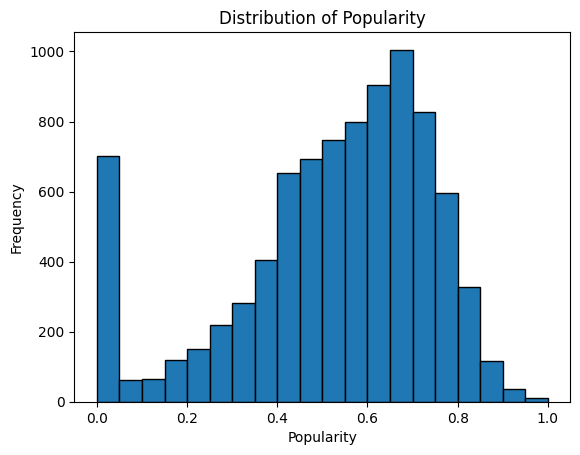

In [32]:
# Plot histogram
plt.hist(songs['Popularity'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity');